# Real Estate project

In [111]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [112]:
housing = pd.read_csv("Project data - housingdata.csv")

In [113]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [114]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CRIM        506 non-null    float64
 1   ZN          506 non-null    float64
 2   INDUS       506 non-null    float64
 3   CHAS        506 non-null    int64  
 4   NOX         506 non-null    float64
 5   RM          506 non-null    float64
 6   AGE         506 non-null    float64
 7   DIS         506 non-null    float64
 8   RAD         506 non-null    int64  
 9   TAX         506 non-null    int64  
 10   PTRATIO    506 non-null    float64
 11  B           506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [115]:
housing.reset_index(drop=True)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [116]:
housing.iloc[0]

CRIM            0.00632
ZN             18.00000
INDUS           2.31000
CHAS            0.00000
NOX             0.53800
RM              6.57500
AGE            65.20000
DIS             4.09000
RAD             1.00000
TAX           296.00000
 PTRATIO       15.30000
B             396.90000
LSTAT           4.98000
MEDV           24.00000
Name: 0, dtype: float64

In [117]:
# printing all columns of the dataframe
print(housing.columns.tolist())

['CRIM    ', 'ZN   ', 'INDUS   ', 'CHAS ', 'NOX       ', 'RM  ', 'AGE  ', 'DIS     ', 'RAD    ', 'TAX     ', ' PTRATIO  ', 'B        ', 'LSTAT    ', 'MEDV']


In [118]:
housing.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', ' PTRATIO', 'B', 'LSTAT', 'MEDV']

In [119]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

housing.describe()
housing.hist(bins=50, figsize=(20, 15))

## Training test

In [120]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size= 0.2, random_state = 42)
print(len(train_set), len(test_set))

404 102


## Strategic Splitting of Column CHAS

Colums CHAS has only 2 values and these values must be split eqully in both trainging and testing set

In [121]:
from sklearn.model_selection import StratifiedShuffleSplit

In [122]:
shuffle = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in shuffle.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [123]:
strat_train_set["CHAS"].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [124]:
strat_test_set["CHAS"].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [125]:
housing = strat_train_set.copy()

## Correlations

In [126]:
corr_matrix = housing.corr()
corr_matrix["MEDV"].sort_values(ascending=False)

MEDV        1.000000
RM          0.679894
B           0.361761
ZN          0.339741
DIS         0.240451
CHAS        0.205066
AGE        -0.364596
RAD        -0.374693
CRIM       -0.393715
NOX        -0.422873
TAX        -0.456657
INDUS      -0.473516
 PTRATIO   -0.493534
LSTAT      -0.740494
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f241cd38910>,
      dtype=object)

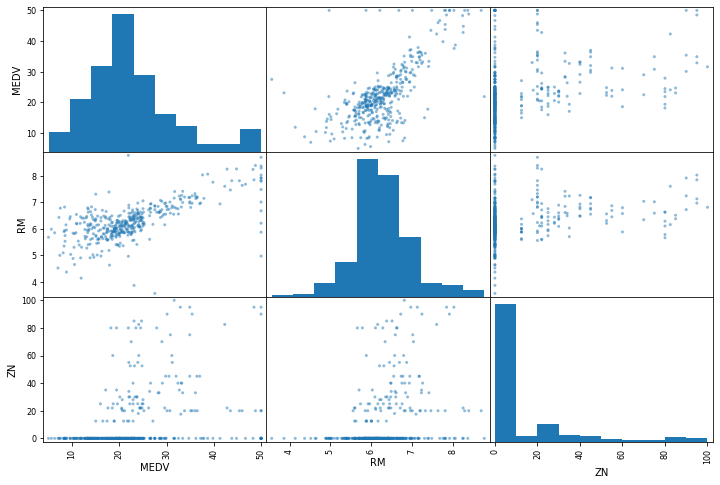

In [127]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV","RM","ZN"]
scatter_matrix(housing[attributes], figsize = (12,8))

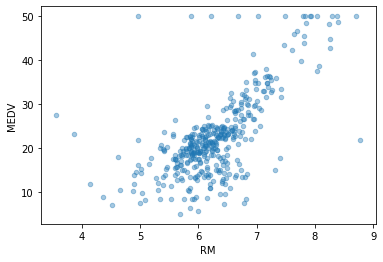

In [128]:
housing.plot(kind= "scatter",x = "RM", y= "MEDV", alpha=0.4)

## Scikit-learn Design



1. ESTIMATORS
2. TRANSFORMERS
3. PREDICTORS 

# Feature Scanling

# Primirialy two types


1.   Min-Max Scaling
2.   Standardization



### **PipeLine**

In [129]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

my_pipeline = Pipeline([
                        ('imputer', SimpleImputer(strategy="median")),
                        ('std_scaler', StandardScaler()),
])


In [130]:
housing_features = housing.drop("MEDV", axis=1)
housing_label = housing["MEDV"]

In [131]:
housing_num = my_pipeline.fit_transform(housing_features)

In [132]:
housing_num

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

## Slecting Model

In [133]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
# model = LinearRegression()
# model = DecisionTreeRegressor()
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(housing_num, housing_label)

RandomForestRegressor()

In [134]:
some_data = housing_features.iloc[:5]
some_labels = housing_label.iloc[:5]
prepared_data = my_pipeline.transform(some_data)
model.predict(prepared_data)

array([22.441, 25.306, 16.366, 23.341, 23.429])

In [135]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

### Mean Squared Error

In [136]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num)

In [137]:
lin_mse = mean_squared_error(housing_label, housing_predictions)
lin_rmse = np.sqrt(lin_mse)

In [138]:
lin_rmse

1.192406995563723

# Cross Validation

In [139]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num, housing_label, scoring="neg_mean_squared_error", cv=10 )
rmse_scores = np.sqrt(-scores)

In [140]:

rmse_scores

array([2.8895526 , 2.89798805, 4.44236758, 2.67076741, 3.35771199,
       2.59452199, 4.79817648, 3.2869163 , 3.53889812, 3.21787904])

In [141]:
def PrintScores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard Deviation:", scores.std())

In [142]:
PrintScores(rmse_scores)

Scores: [2.8895526  2.89798805 4.44236758 2.67076741 3.35771199 2.59452199
 4.79817648 3.2869163  3.53889812 3.21787904]
Mean: 3.369477955381245
Standard Deviation: 0.6922641223919115


## **DecisionTree**

Scores: 
[4.0467994  5.33598003 5.48639115 3.76770617 4.04468787 3.2221499 5.05472551 3.82504902 3.36815973 3.91206467]

Mean: 4.20637134602635

Standard Deviation: 0.7603628638316902


## **Linear Regression**
Scores: [4.21674442 4.26026816 5.1071608  3.82881892 5.34093789 4.3785611
 7.47384779 5.48226252 4.14885722 6.0669122 ]

Mean: 5.030437102767305

Standard Deviation: 1.060766115829483


## **Random Forrest Regressor**
Scores: [2.83815075 2.77614524 4.42752813 2.60764389 3.4711946  2.57147954
 4.91179045 3.38592251 2.96585683 3.38025445]

Mean: 3.333596641007167

Standard Deviation: 0.7423281668654583

In [143]:
# Saving Model
from joblib import dump, load
dump(model, 'PRM.joblib')

['PRM.joblib']

## Testing Model on Test Data

In [144]:
test_features = strat_test_set.drop("MEDV", axis=1)
test_labels = strat_test_set["MEDV"].copy()

num_test_features = my_pipeline.transform(test_features)
final = model.predict(num_test_features)
final

array([24.569, 11.504, 25.844, 21.689, 18.382, 14.777, 19.886, 14.867,
       32.574, 41.34 , 19.463, 11.913, 24.01 , 25.995, 19.625, 11.34 ,
       31.432, 14.152, 23.434, 18.705, 19.998, 17.613, 17.871, 22.08 ,
       18.335, 31.051, 16.011, 32.859,  8.99 , 33.975, 23.689, 21.421,
       22.957, 10.495, 21.24 , 11.539, 43.39 , 24.36 , 23.62 , 41.638,
       24.028, 28.787, 20.135, 20.654, 18.63 , 33.688, 44.132, 20.326,
       20.559, 21.949, 21.132, 14.766, 21.285, 15.066, 24.75 , 32.569,
       41.514, 29.173, 19.679, 20.905, 46.91 ,  9.937, 18.81 , 25.151,
       14.724, 32.984, 19.946, 17.841, 19.168, 33.951, 26.846, 23.172,
       21.332, 22.487, 34.13 , 12.725, 15.906, 19.737, 20.774, 21.35 ,
       22.208, 20.981, 14.357, 22.812, 20.255, 20.908, 14.327, 21.302,
       21.764, 23.386, 18.649, 26.941,  7.353, 26.152, 19.409, 29.257,
       19.66 , 31.658, 14.586, 27.127, 21.16 , 20.152])

In [145]:
np.array(test_labels)

array([16.5, 10.2, 30.1, 23. , 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1,
       13.8, 25. , 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5,
       10.4, 23.2, 18.6, 28.5, 15.2, 32. ,  7.2, 34.6, 20.1, 20.6, 23.6,
       13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44. , 28.1, 31. , 21.7, 23.4,
       19.5, 33.1, 41.7, 18.7, 19.9, 20.6, 21.2, 13.6, 20.3, 17.8, 27.1,
       31.5, 50. , 29.1, 18.9, 20.4, 50. ,  7.2, 17.2, 36.2, 14.6, 33.2,
       23.8, 19.9, 21.5, 37.3, 27. , 22. , 24.3, 19.8, 33.3,  7. , 19.4,
       20.9, 21.1, 20.4, 22.2, 11.9, 11.7, 21.6, 19.7, 23. , 16.7, 21.7,
       20.6, 23.3, 19.6, 28. ,  5. , 24.4, 20.8, 24.8, 21.8, 23.6, 19. ,
       25. , 20.3, 21.5])

## Error Estimation

In [146]:
Final_MSE = mean_squared_error(test_labels, final)
Final_RMSE = np.sqrt(Final_MSE)
Final_RMSE

2.963281367130753